In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [31]:
pathmentalhealthtech = '../data/mental_health_and_technology_usage_2024.csv'


mental_health_techno_df = pd.read_csv(pathmentalhealthtech)

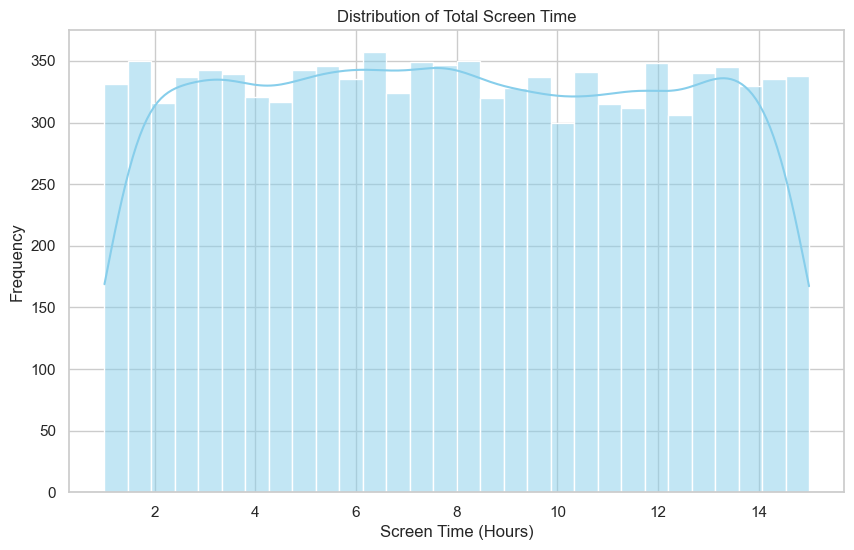

Correlation between Screen Time and Sleep Hours: -0.01


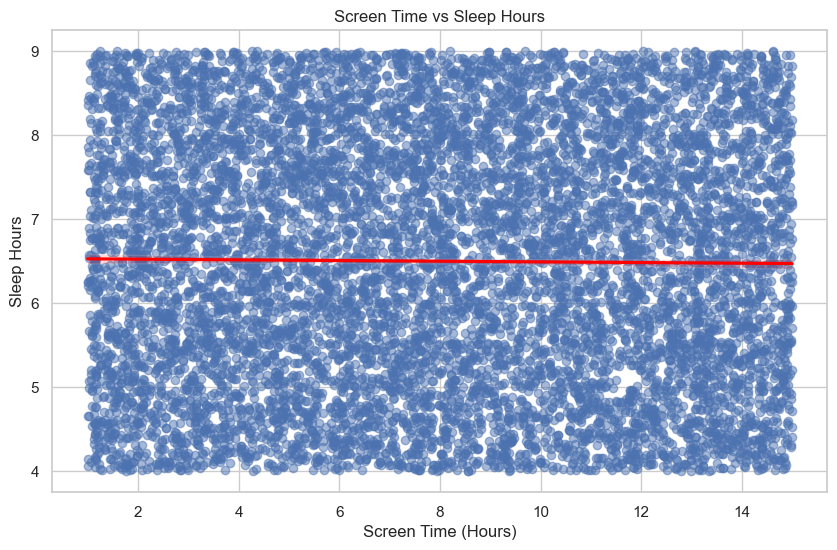

C:\Users\Natas\AppData\Local\Temp\ipykernel_24620\608500464.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Mental_Health_Status', y='Screen_Time_Hours', data=mental_health_techno_df, palette="coolwarm")


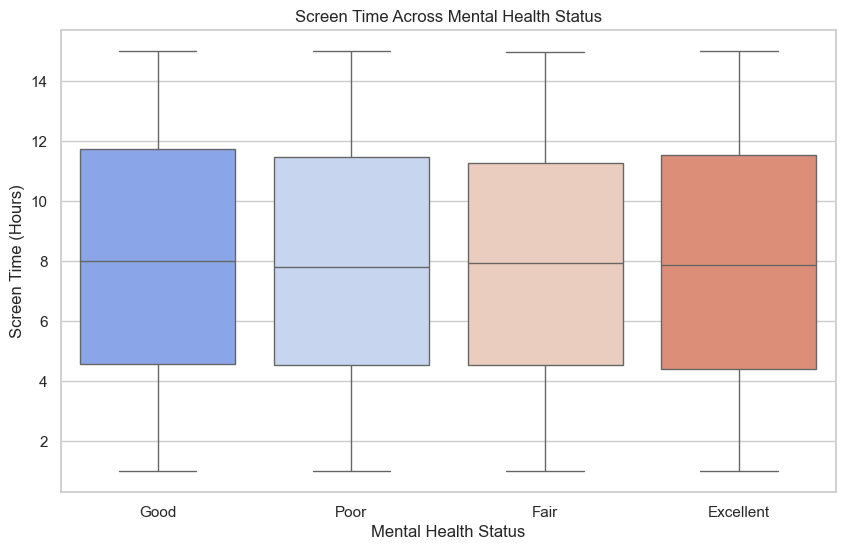

C:\Users\Natas\AppData\Local\Temp\ipykernel_24620\608500464.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Stress_Level', y='Screen_Time_Hours', data=mental_health_techno_df, palette="muted")


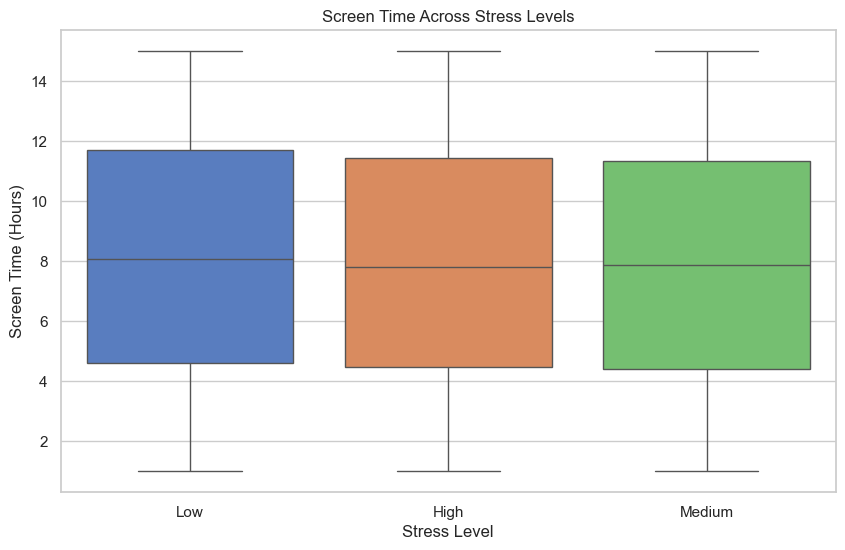

Correlation between Technology_Usage_Hours and Sleep Hours: -0.01


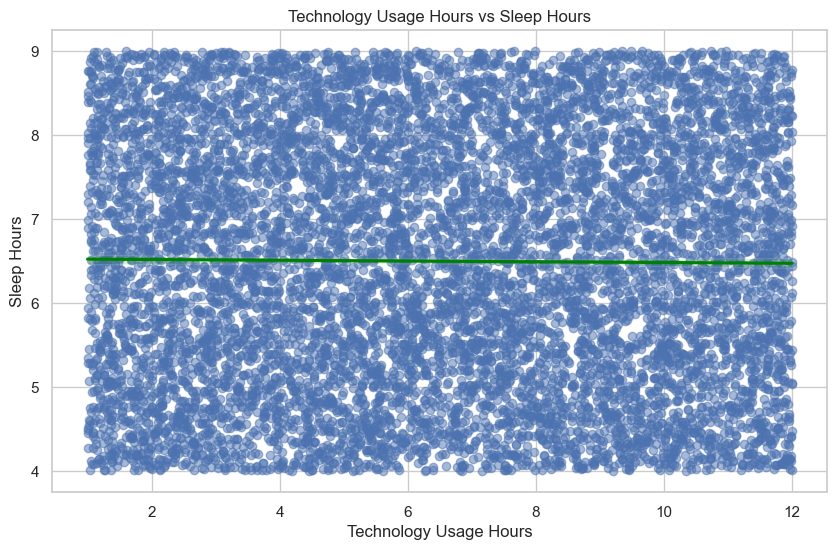

Correlation between Social_Media_Usage_Hours and Sleep Hours: 0.00


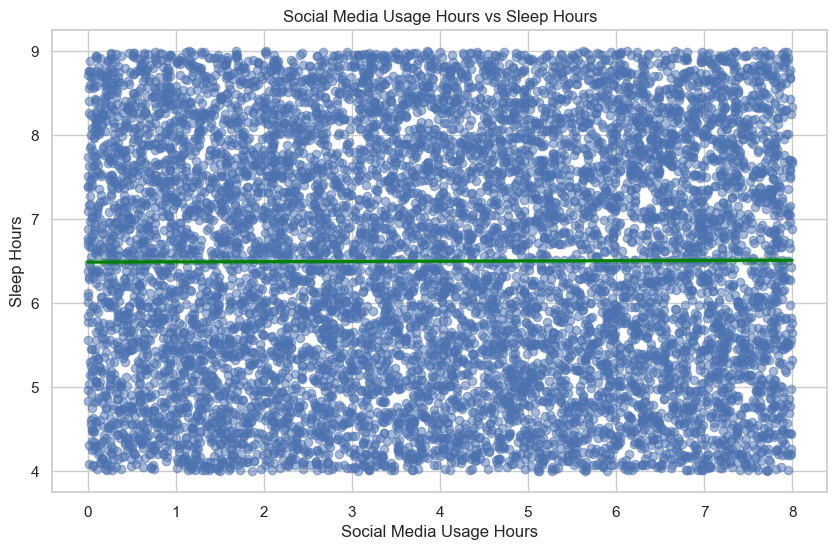

Correlation between Gaming_Hours and Sleep Hours: 0.01


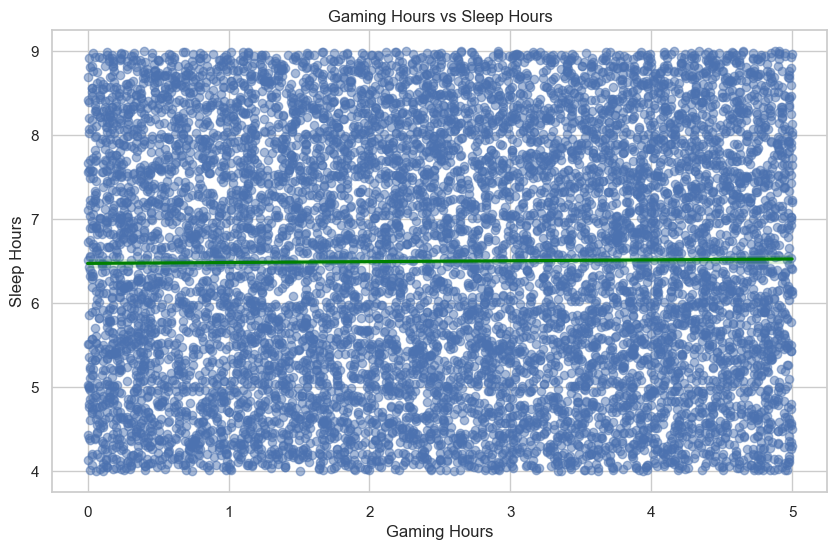

Correlation between Technology_Usage_Hours and Stress Level (Numeric): -0.01


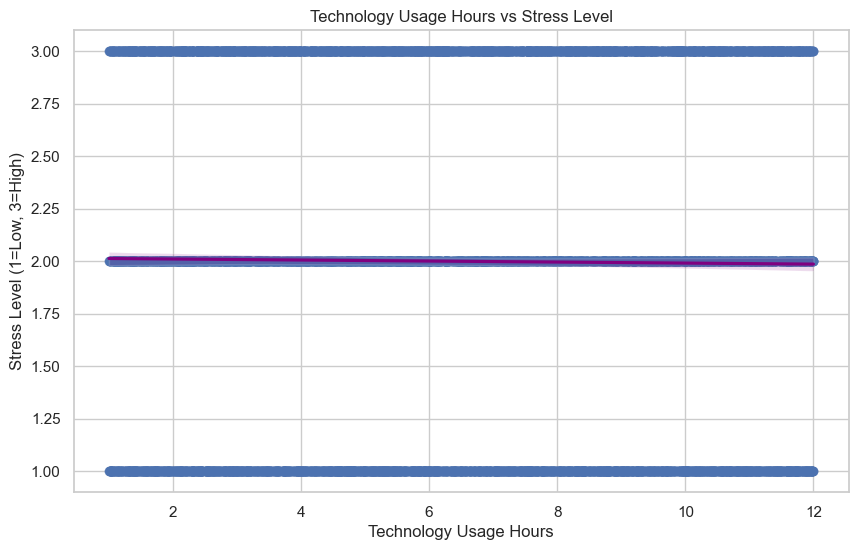

Correlation between Social_Media_Usage_Hours and Stress Level (Numeric): 0.01


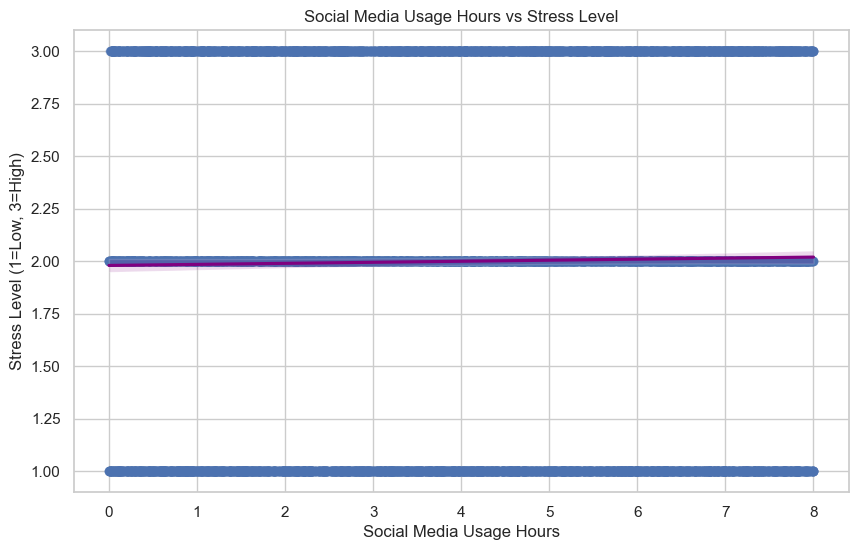

Correlation between Gaming_Hours and Stress Level (Numeric): -0.01


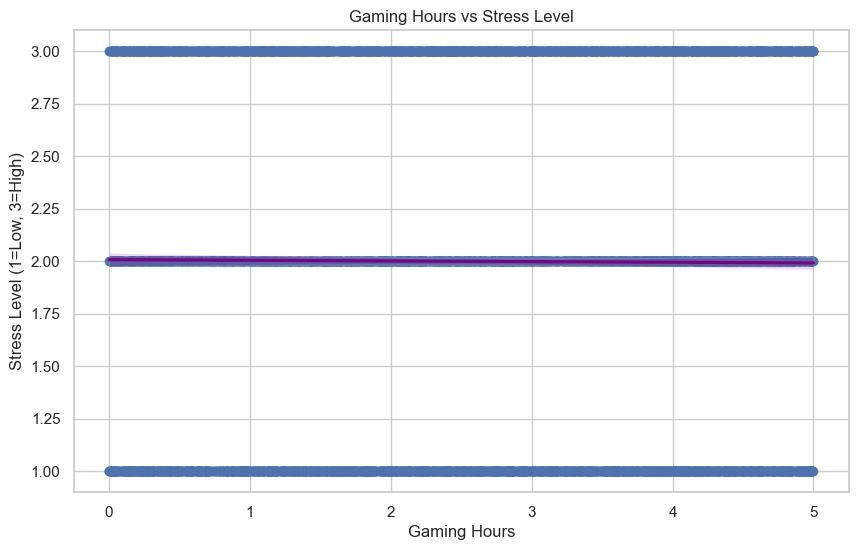

In [32]:
# Set seaborn style
sns.set(style="whitegrid")

# Function to compute and display correlation
def display_correlation(x, y, xlabel, ylabel):
    corr, _ = pearsonr(mental_health_techno_df[x], mental_health_techno_df[y])
    print(f"Correlation between {xlabel} and {ylabel}: {corr:.2f}")

# 1. Distribution of Total Screen Time
plt.figure(figsize=(10, 6))
sns.histplot(mental_health_techno_df['Screen_Time_Hours'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Total Screen Time')
plt.xlabel('Screen Time (Hours)')
plt.ylabel('Frequency')
plt.show()

# 2. Screen Time vs Sleep Hours
display_correlation('Screen_Time_Hours', 'Sleep_Hours', 'Screen Time', 'Sleep Hours')
plt.figure(figsize=(10, 6))
sns.regplot(x='Screen_Time_Hours', y='Sleep_Hours', data=mental_health_techno_df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Screen Time vs Sleep Hours')
plt.xlabel('Screen Time (Hours)')
plt.ylabel('Sleep Hours')
plt.show()

# 3. Screen Time vs Mental Health Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='Mental_Health_Status', y='Screen_Time_Hours', data=mental_health_techno_df, palette="coolwarm")
plt.title('Screen Time Across Mental Health Status')
plt.xlabel('Mental Health Status')
plt.ylabel('Screen Time (Hours)')
plt.show()

# 4. Screen Time vs Stress Level
plt.figure(figsize=(10, 6))
sns.boxplot(x='Stress_Level', y='Screen_Time_Hours', data=mental_health_techno_df, palette="muted")
plt.title('Screen Time Across Stress Levels')
plt.xlabel('Stress Level')
plt.ylabel('Screen Time (Hours)')
plt.show()

# 5. Correlation with different types of screen time vs Sleep Hours
screen_types = ['Technology_Usage_Hours', 'Social_Media_Usage_Hours', 'Gaming_Hours']
for col in screen_types:
    display_correlation(col, 'Sleep_Hours', col, 'Sleep Hours')
    plt.figure(figsize=(10, 6))
    sns.regplot(x=col, y='Sleep_Hours', data=mental_health_techno_df, scatter_kws={'alpha':0.5}, line_kws={'color':'green'})
    plt.title(f'{col.replace("_", " ")} vs Sleep Hours')
    plt.xlabel(col.replace("_", " "))
    plt.ylabel('Sleep Hours')
    plt.show()

# 6. Correlation with different types of screen time vs Stress Level (numeric mapping)
# Convert stress level to ordinal scale for correlation
stress_map = {'Low': 1, 'Medium': 2, 'High': 3}
mental_health_techno_df['Stress_Level_Numeric'] = mental_health_techno_df['Stress_Level'].map(stress_map)

for col in screen_types:
    display_correlation(col, 'Stress_Level_Numeric', col, 'Stress Level (Numeric)')
    plt.figure(figsize=(10, 6))
    sns.regplot(x=col, y='Stress_Level_Numeric', data=mental_health_techno_df, scatter_kws={'alpha':0.5}, line_kws={'color':'purple'})
    plt.title(f'{col.replace("_", " ")} vs Stress Level')
    plt.xlabel(col.replace("_", " "))
    plt.ylabel('Stress Level (1=Low, 3=High)')
    plt.show()


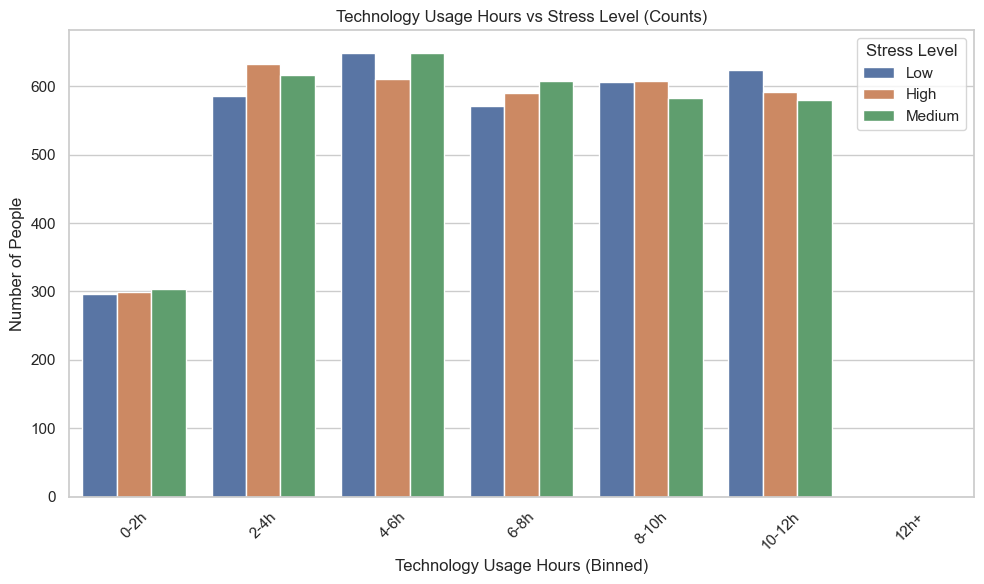

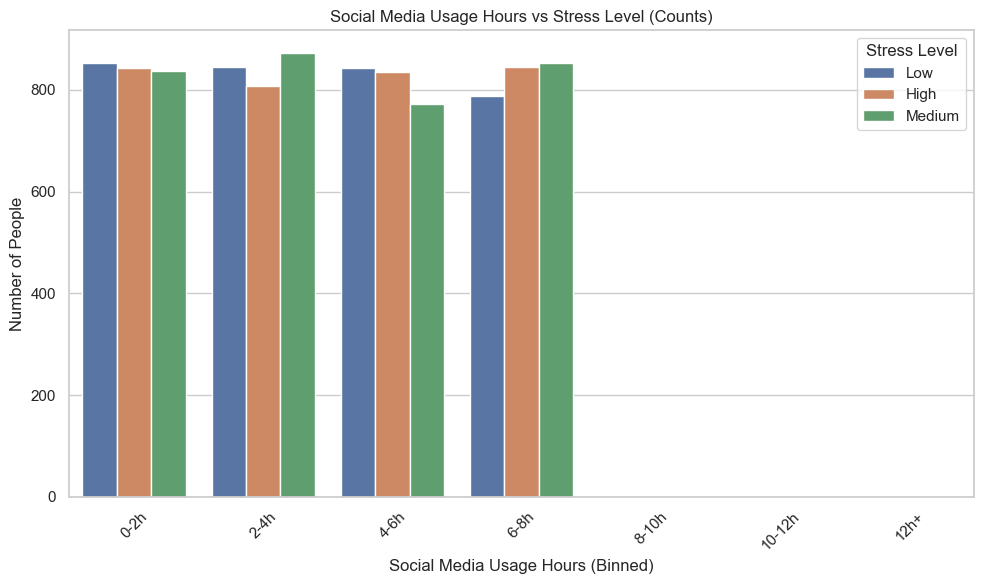

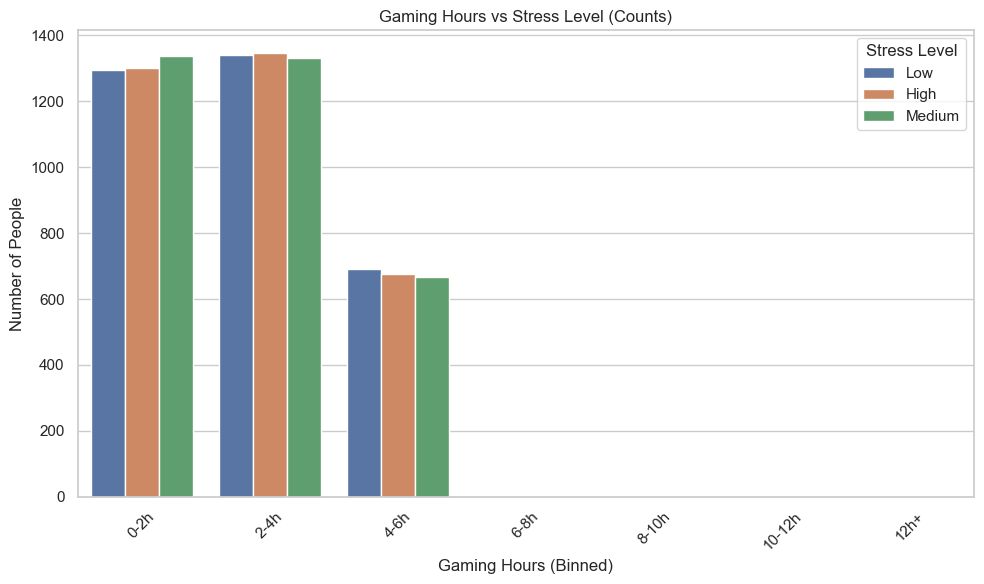

In [33]:
bins = [0, 2, 4, 6, 8, 10, 12, 24]
labels = ['0-2h', '2-4h', '4-6h', '6-8h', '8-10h', '10-12h', '12h+']

for col in screen_types:
    mental_health_techno_df[f'{col}_bin'] = pd.cut(mental_health_techno_df[col], bins=bins, labels=labels)

    plt.figure(figsize=(10, 6))
    sns.countplot(x=f'{col}_bin', hue='Stress_Level', data=mental_health_techno_df)
    plt.title(f'{col.replace("_", " ")} vs Stress Level (Counts)')
    plt.xlabel(f'{col.replace("_", " ")} (Binned)')
    plt.ylabel('Number of People')
    plt.legend(title='Stress Level')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

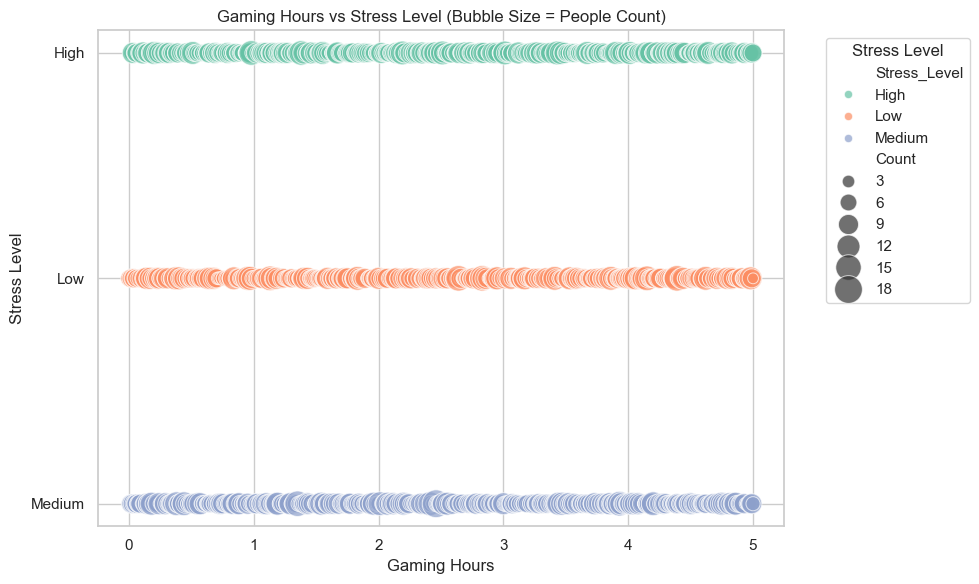

In [34]:
# Group by actual values
grouped = mental_health_techno_df.groupby(['Gaming_Hours', 'Stress_Level']).size().reset_index(name='Count')

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Gaming_Hours', 
    y='Stress_Level', 
    size='Count', 
    data=grouped, 
    hue='Stress_Level', 
    sizes=(40, 400), 
    palette='Set2', 
    alpha=0.7
)
plt.title('Gaming Hours vs Stress Level (Bubble Size = People Count)')
plt.xlabel('Gaming Hours')
plt.ylabel('Stress Level')
plt.legend(title='Stress Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


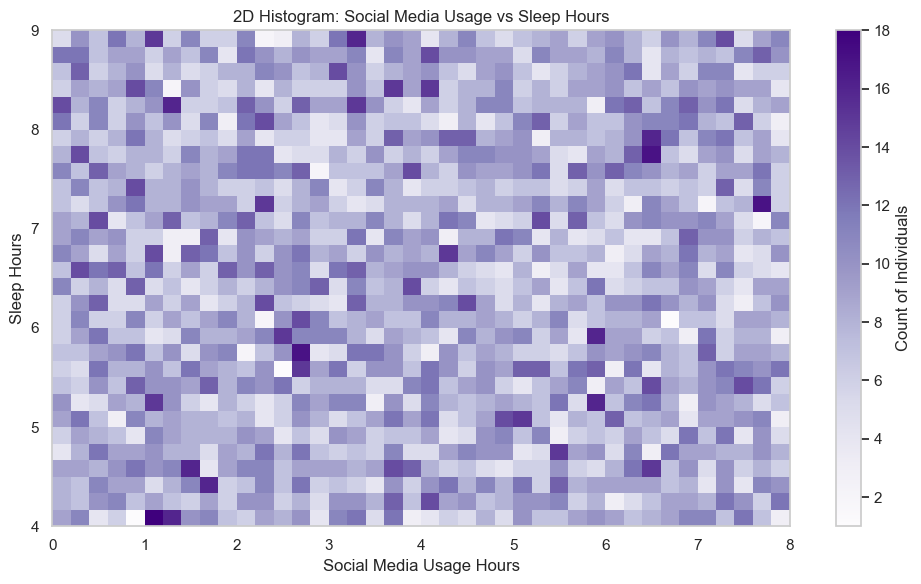

In [35]:
plt.figure(figsize=(10, 6))
plt.hist2d(mental_health_techno_df['Social_Media_Usage_Hours'], 
           mental_health_techno_df['Sleep_Hours'], 
           bins=[40, 30], cmap='Purples')
plt.colorbar(label='Count of Individuals')
plt.xlabel('Social Media Usage Hours')
plt.ylabel('Sleep Hours')
plt.title('2D Histogram: Social Media Usage vs Sleep Hours')
plt.tight_layout()
plt.show()


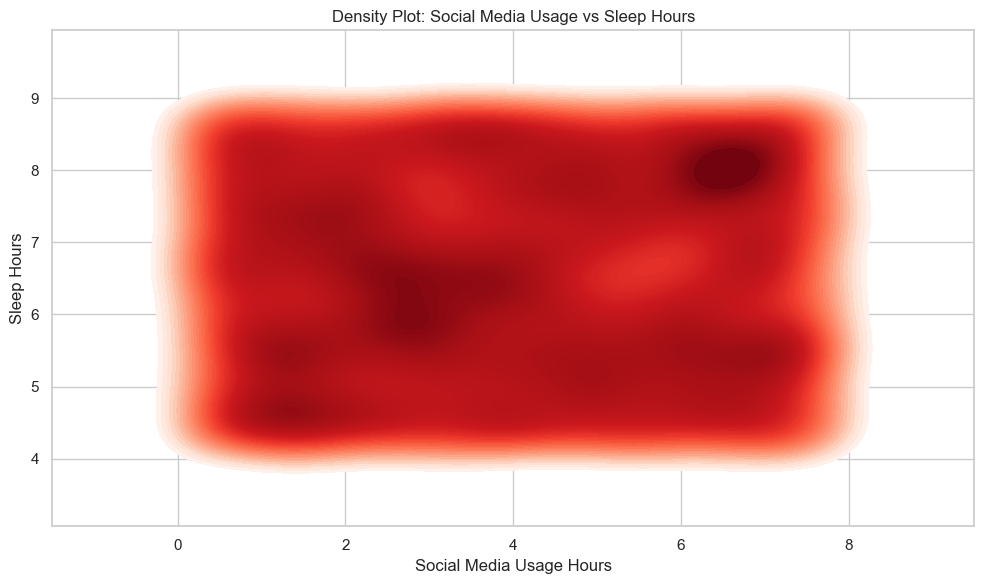

In [36]:
plt.figure(figsize=(10, 6))
sns.kdeplot(
    x=mental_health_techno_df['Social_Media_Usage_Hours'], 
    y=mental_health_techno_df['Sleep_Hours'], 
    cmap="Reds", fill=True, thresh=0.05, levels=100
)
plt.title('Density Plot: Social Media Usage vs Sleep Hours')
plt.xlabel('Social Media Usage Hours')
plt.ylabel('Sleep Hours')
plt.tight_layout()
plt.show()


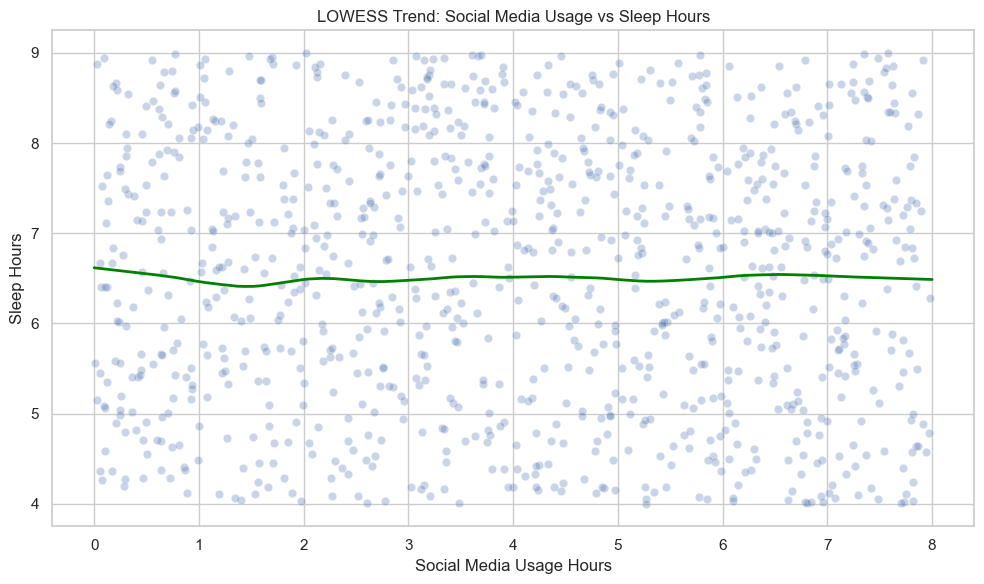

In [37]:
import statsmodels.api as sm

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Social_Media_Usage_Hours', 
    y='Sleep_Hours', 
    data=mental_health_techno_df.sample(1000), alpha=0.3)

lowess = sm.nonparametric.lowess
smoothed = lowess(endog=mental_health_techno_df['Sleep_Hours'], 
                  exog=mental_health_techno_df['Social_Media_Usage_Hours'], frac=0.2)

plt.plot(smoothed[:, 0], smoothed[:, 1], color='green', linewidth=2)
plt.title('LOWESS Trend: Social Media Usage vs Sleep Hours')
plt.xlabel('Social Media Usage Hours')
plt.ylabel('Sleep Hours')
plt.tight_layout()
plt.show()


(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.]),
 [Text(-1.0, 0, '−1'),
  Text(0.0, 0, '0'),
  Text(1.0, 0, '1'),
  Text(2.0, 0, '2'),
  Text(3.0, 0, '3'),
  Text(4.0, 0, '4'),
  Text(5.0, 0, '5'),
  Text(6.0, 0, '6')])

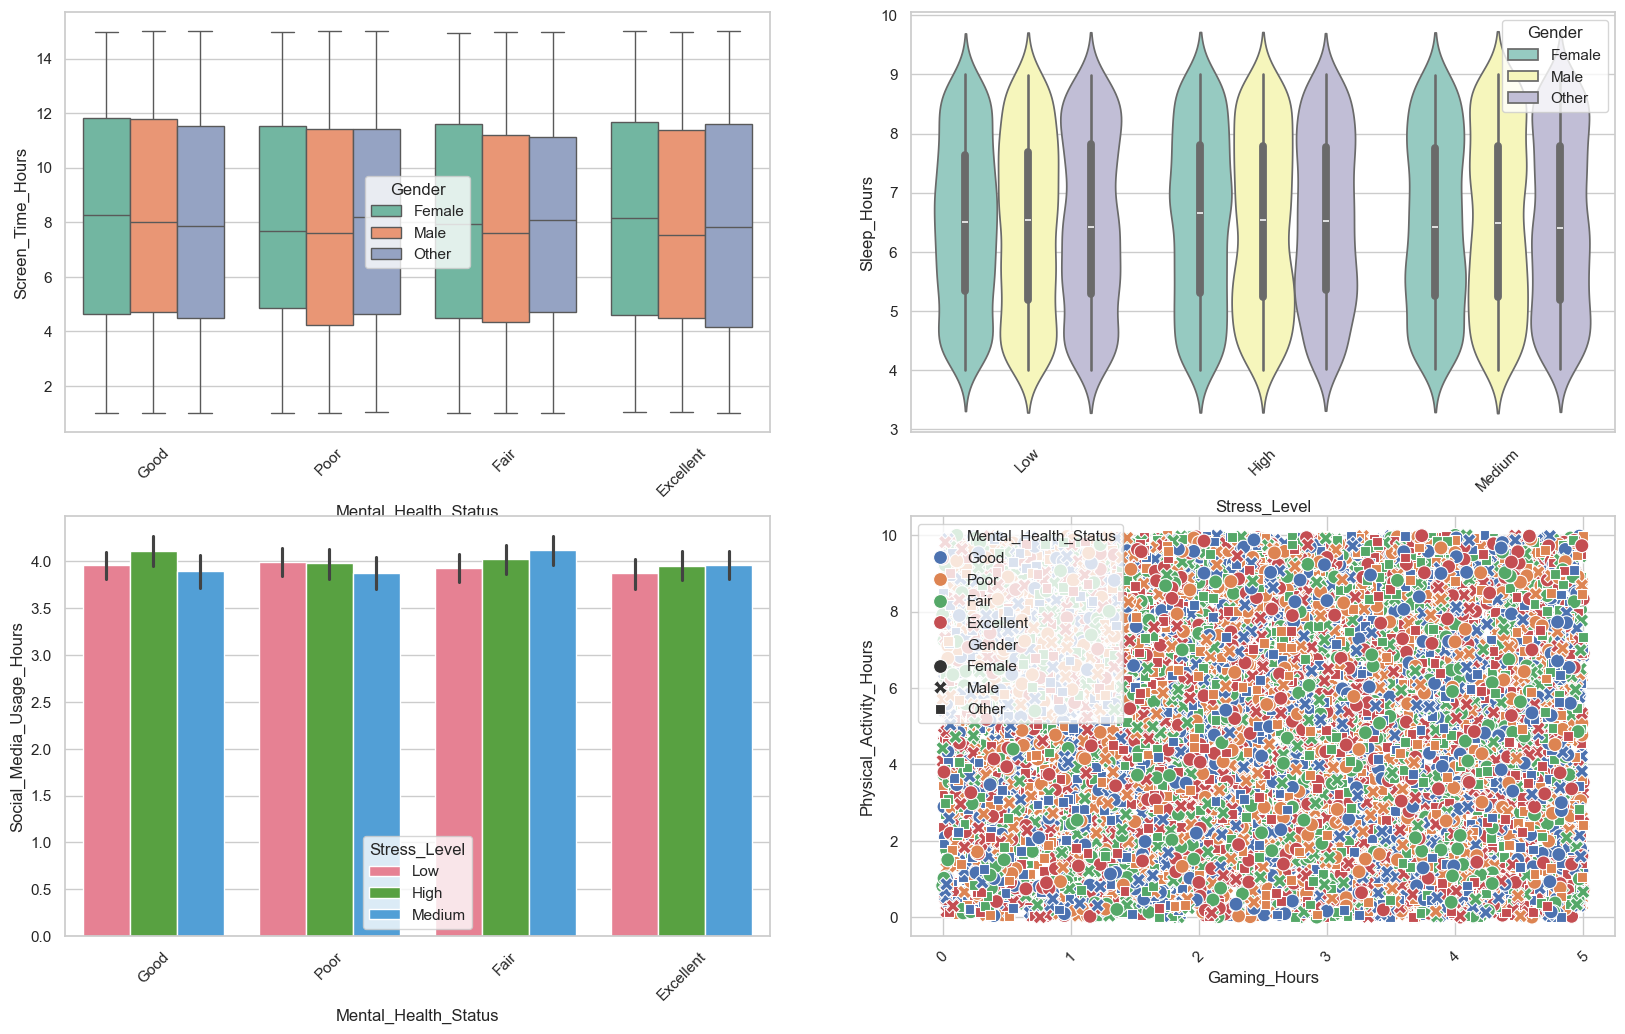

In [38]:
mental_health_techno_df.groupby(['Gender','Mental_Health_Status', 'Stress_Level']).agg({
    'Screen_Time_Hours': 'mean',
    'Sleep_Hours': 'mean',
    'Technology_Usage_Hours':'mean',
    'Social_Media_Usage_Hours': 'mean',
    'Gaming_Hours': 'mean',
    'Physical_Activity_Hours':'mean'
}).reset_index()

df = mental_health_techno_df.groupby(['Gender','Mental_Health_Status', 'Stress_Level']).agg({
    'Screen_Time_Hours': 'mean',
    'Sleep_Hours': 'mean',
    'Technology_Usage_Hours':'mean',
    'Social_Media_Usage_Hours': 'mean',
    'Gaming_Hours': 'mean',
    'Physical_Activity_Hours':'mean'
}).reset_index()

plt.figure(figsize=(20, 12))
    
plt.subplot(2, 2, 1)
sns.boxplot(data=mental_health_techno_df, x='Mental_Health_Status', y='Screen_Time_Hours', 
            hue='Gender', palette='Set2')
plt.xticks(rotation=45)

plt.subplot(2, 2, 2)
sns.violinplot(data=mental_health_techno_df, x='Stress_Level', y='Sleep_Hours', 
                hue='Gender', palette='Set3')
plt.xticks(rotation=45)

plt.subplot(2, 2, 3)
sns.barplot(data=mental_health_techno_df, x='Mental_Health_Status', y='Social_Media_Usage_Hours',
            hue='Stress_Level', palette='husl')
plt.xticks(rotation=45)

plt.subplot(2, 2, 4)
sns.scatterplot(data=mental_health_techno_df, x='Gaming_Hours', y='Physical_Activity_Hours',
                hue='Mental_Health_Status', style='Gender', s=100)
plt.xticks(rotation=45)

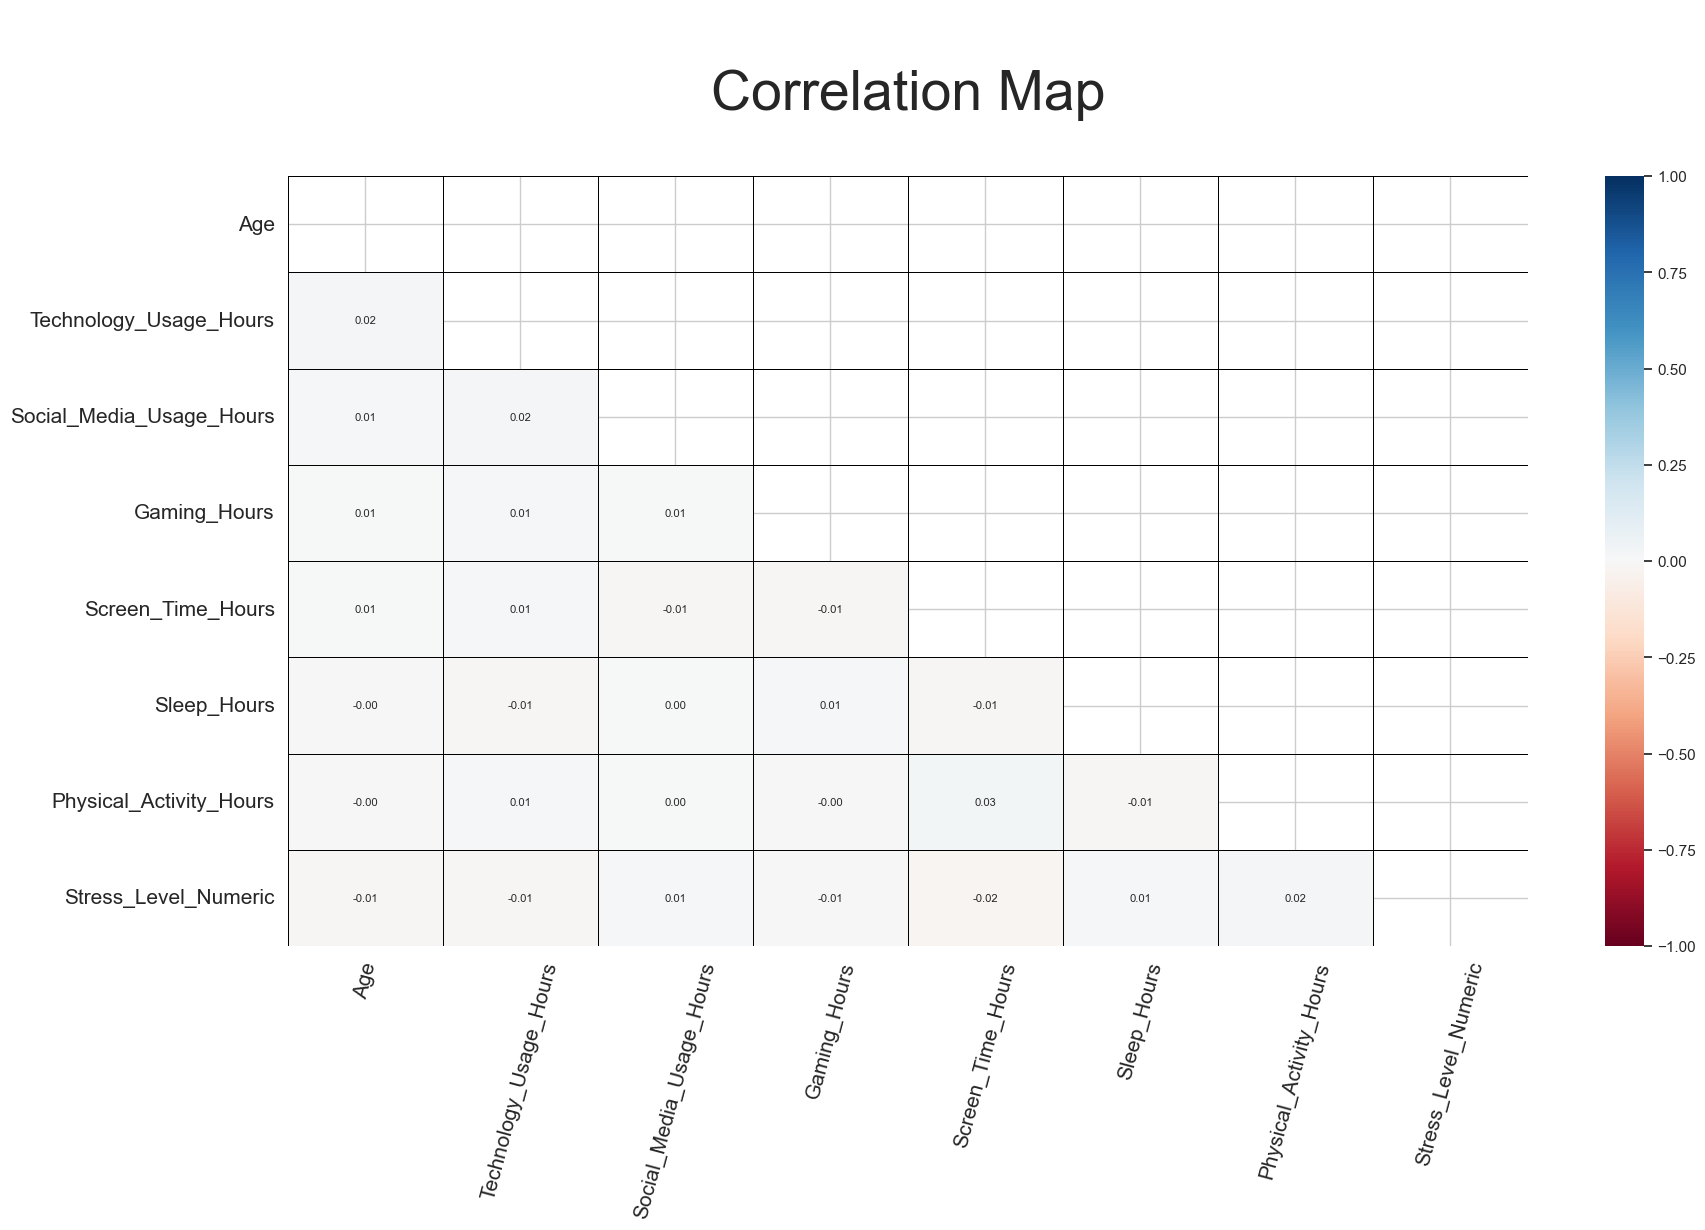

In [44]:
import numpy as np
numeric_df = mental_health_techno_df.select_dtypes(include=['int64', 'float64'])
numeric_df.corr()

mtx = np.triu(numeric_df.corr())
f, ax = plt.subplots(figsize = (20,10))
sns.heatmap(numeric_df.corr(),
            annot= True,
            fmt = ".2f",
            ax=ax,
            vmin = -1,
            vmax = 1,
            cmap = "RdBu",
            mask = mtx,
            linewidth = 0.4,
            linecolor = "black",
            annot_kws={"size": 8})
plt.yticks(rotation=0,size=15)
plt.xticks(rotation=75,size=15)
plt.title('\nCorrelation Map\n', size = 40)
plt.show()

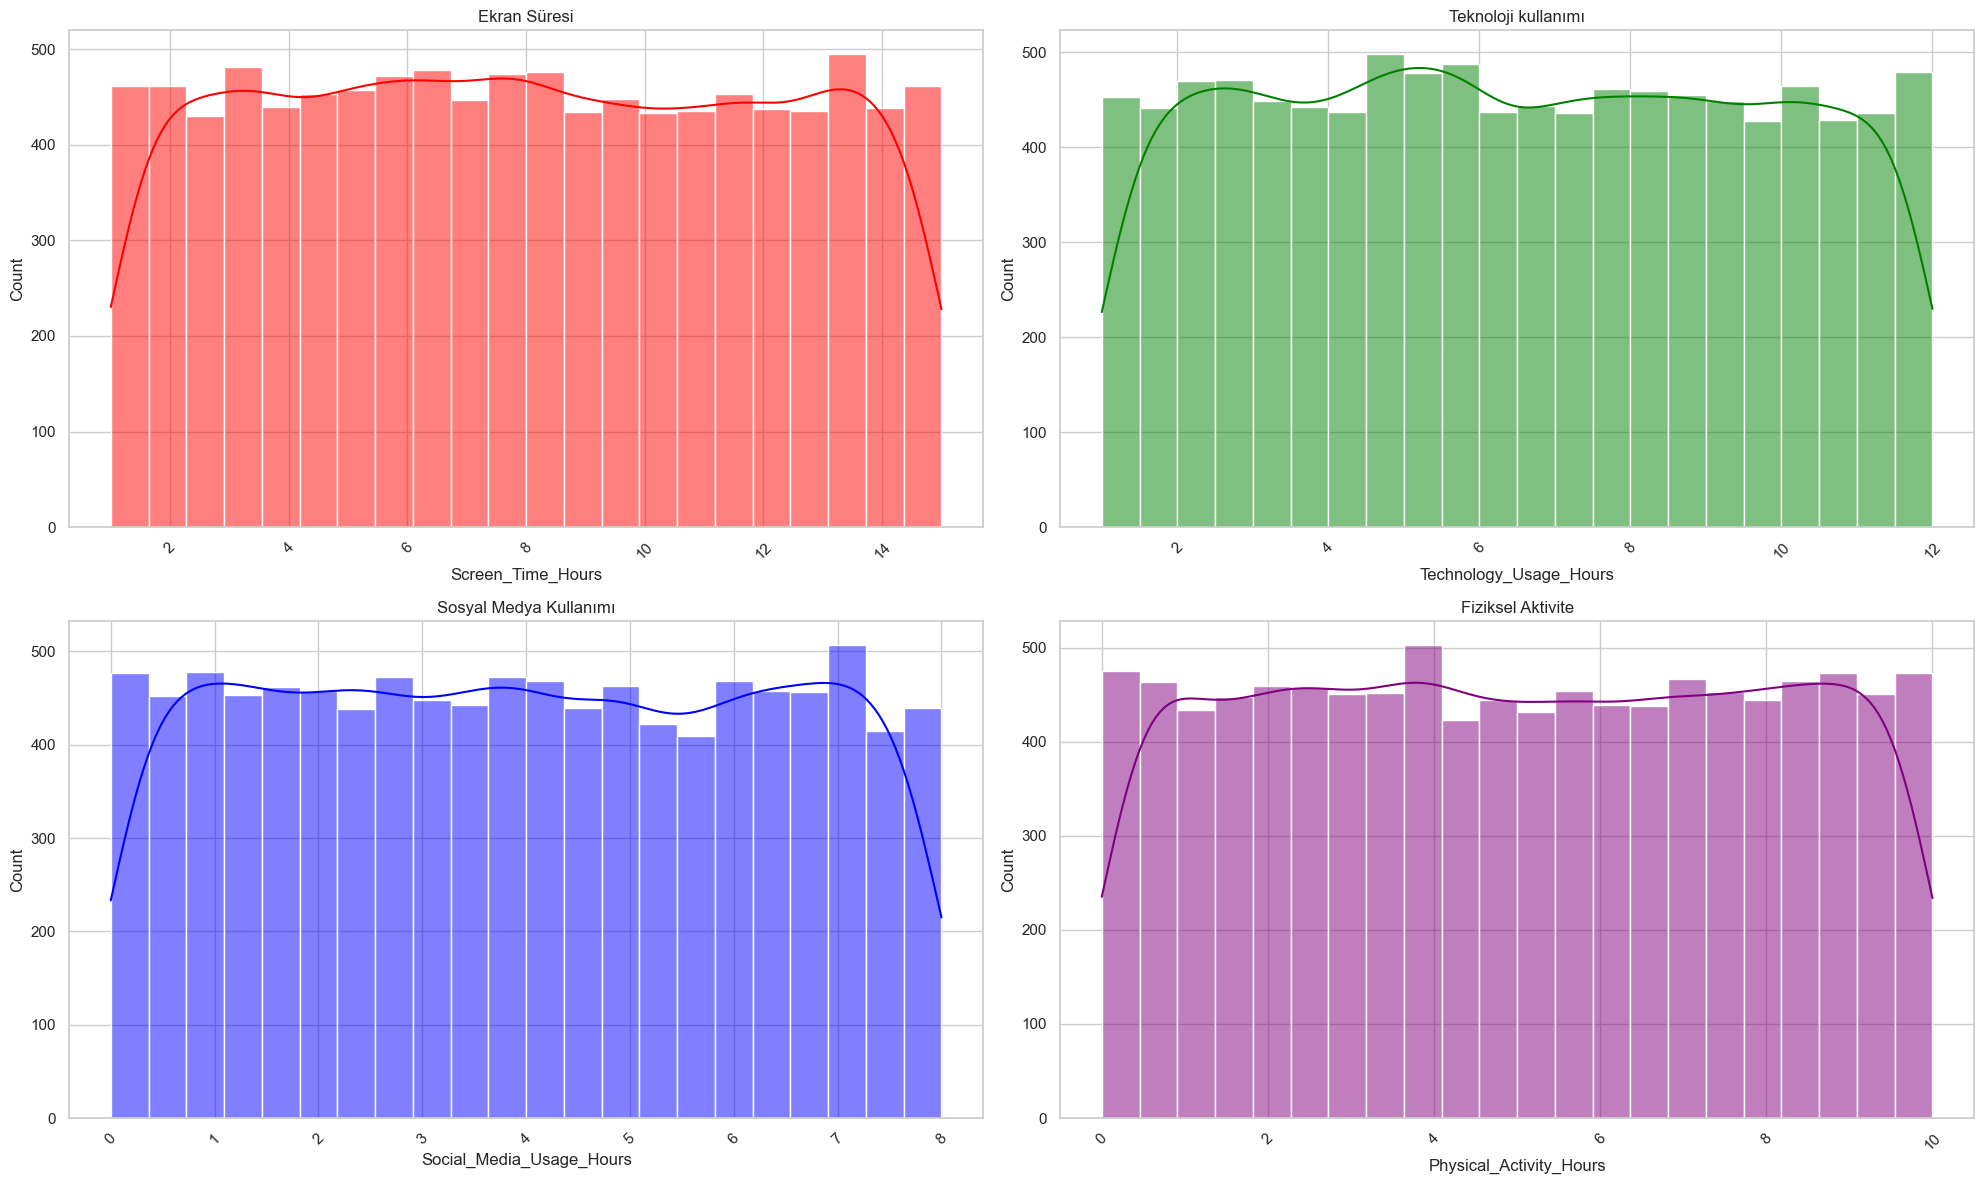

In [45]:
plt.figure(figsize=(20, 12))
    
    
plt.subplot(2, 2, 1)
sns.histplot(data=numeric_df, x='Screen_Time_Hours', color='red', kde=True)
plt.title('Ekran Süresi', size=12)
plt.xticks(rotation=45)


plt.subplot(2, 2, 2)
sns.histplot(data=numeric_df, x='Technology_Usage_Hours', color='green', kde=True)
plt.title('Teknoloji kullanımı', size=12)
plt.xticks(rotation=45)

plt.subplot(2, 2, 3)
sns.histplot(data=numeric_df, x='Social_Media_Usage_Hours', color='blue', kde=True)
plt.title('Sosyal Medya Kullanımı', size=12)
plt.xticks(rotation=45)


plt.subplot(2, 2, 4)
sns.histplot(data=numeric_df, x='Physical_Activity_Hours', color='purple', kde=True)
plt.title('Fiziksel Aktivite', size=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()